In [2]:
# C4 조 화이팅! 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import statsmodels.api as sm



from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy import stats

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, scale
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.api import qqplot
from statsmodels.api import add_constant
# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 분류 Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier

# 모델 성능 평가: Precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import font_manager
from matplotlib import rc
import matplotlib as mpl
import matplotlib.pyplot as plt

# Check the Frequency of Variable
from collections import Counter
%matplotlib inline
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 


In [4]:
# 글꼴 설정
mpl.rcParams['font.family'] = 'NanumGothic'

# 마이너스 기호 깨짐 해결
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
# 한석현 : 관리자 권한 뻇겼는데도 저거 실행 안됨.

# 그래프 그리기

In [6]:
#사용자 정의 함수
#data: 사용할 데이터
#x: x축에 들어갈 열 이름
#hue: 구분하는 기준
#x_order: x축에 들어가는 데이터 순서
#hue_order: hue에 들어가는 데이터 순서

def print_barplot(data, x, hue=None, x_order=None, hue_order=None):
    sns.countplot(x=x, hue=hue, data=data, dodge=True, order=x_order, hue_order=hue_order)
    
    plt.title("Count Plot of Categorical Variables")
    plt.xlabel("{}".format(x))
    plt.ylabel("Frequency")

    # 범례 추가
    plt.legend()

    # 그래프 보여주기
    plt.show()

age_order = ['10대', '20대', '30대', '40대', '50대', '60대이상']
gender_order = ['남성', '여성']  # 성별 순서

# Users 데이터에 파생변수 생성: 방문 횟수, 구매 금액

In [7]:
df_sales_raw = pd.read_csv('C:/Users/hanseokhyun/Desktop/빅데이터 프로젝트/result.csv')

In [8]:
df_users_raw = pd.read_csv('C:/Users/hanseokhyun/Desktop/빅데이터 프로젝트/cvs_users.csv',encoding = 'cp949')

In [9]:
df_sales_raw["SalesDate"] = pd.to_datetime(df_sales_raw['SalesDate'])
df_sales_raw["SalesDT"] = pd.to_datetime(df_sales_raw['SalesDT'])

In [10]:
# 파일 불러오기 최종 파일을 각자 맡은 csv 를 전처리 하였기에, 바로 resulr를 sales_raw로 불러옴

In [11]:
df_sales_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509300 entries, 0 to 509299
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   idUser           509300 non-null  object        
 1   idPOS            509300 non-null  object        
 2   SalesDT          509300 non-null  datetime64[ns]
 3   SalesDate        509300 non-null  datetime64[ns]
 4   ItemId           509300 non-null  object        
 5   Gender           509300 non-null  object        
 6   AgeGroup         509300 non-null  object        
 7   ItemIdLarge      509300 non-null  object        
 8   ItemNameLarge    509300 non-null  object        
 9   ItemIdMiddle     509300 non-null  object        
 10  ItemNameMiddle   509300 non-null  object        
 11  ItemName         509300 non-null  object        
 12  Item_CatORMaker  507224 non-null  object        
 13  Price            509300 non-null  int64         
 14  ImageUrl         509

In [12]:
df_sales_raw.dropna(subset=['Item_CatORMaker'], inplace=True)

In [13]:
# 아이템에 해당하는 중분류와 가격이 일치 하지 않기에 이상치라 판단하고 삭제 처리 하였다.

In [14]:
df_sales_raw.reset_index(drop=True, inplace=True)

In [15]:
# 인데스 초기화

In [16]:
## 이거 자주 써서 이해 잘 해야해

In [17]:
visit_counts = df_sales_raw.groupby(["idUser", "SalesDT"]).size().groupby("idUser").size()
visit_counts

idUser
U100001      3
U100277    175
U100278    249
U100279    672
U100280     36
          ... 
U101094    466
U101095    230
U101096    248
U101097    291
U101098    272
Length: 823, dtype: int64

In [18]:
# 한번 방문시 찍히는 DT의 시간은 같으므로 unique함수를 통해 제거 하려 했는데 \
# user가 모두 2번이 찍히는 현상이 발생 하여 size함수를 두번 써서 id와 sales DT를 그룹화 하여 size를 두번 써서 방문 횟수를 나타나게 하였음

In [20]:
visit_counts = df_sales_raw.groupby(["idUser", "SalesDT"]).size().groupby("idUser").size().rename("VisitCount")
df_users = df_users_raw.merge(visit_counts, left_on="idUser", right_index=True, how="left")
df_users.rename(columns={"idUser_x": "idUser"}, inplace=True)
total_prices = df_sales_raw.groupby("idUser")["Price"].sum()
df_users["TotalPrice"] = df_users["idUser"].map(total_prices)
display(df_users)

,idUser,Gender,AgeGroup,VisitCount,TotalPrice
0,U100001,남성,40대,3.0,8250.0
1,U100002,여성,30대,NaN,NaN
2,U100003,남성,30대,NaN,NaN
3,U100004,남성,30대,NaN,NaN
4,U100005,여성,30대,NaN,NaN
...,...,...,...,...,...
1093,U101094,남성,10대,466.0,2865010.0
1094,U101095,남성,40대,230.0,1717250.0
1095,U101096,여성,30대,248.0,1767010.0
1096,U101097,남성,30대,291.0,2452490.0


In [21]:
# visit count 라는 데이터 프레임을 만들고 아이디에 따른 방문 횟수와 총 금액을 만들었음

In [22]:
# 해야 할 일 방문 횟수 별로 등급을 나눠야 함 토론 필요

In [23]:
df_users.dropna(subset=['VisitCount'], inplace=True)

In [24]:
# 아이디만 있고 방문횟수가 없는 사람들 삭제 해야겠지....?

In [25]:
df_users.reset_index(drop=True, inplace=True)

In [26]:
# 인데스를 초기화 해주어야 함

In [27]:
df_users.describe()

,VisitCount,TotalPrice
count,823.000000,8.230000e+02
mean,250.720535,1.917539e+06
std,185.476750,1.434000e+06
min,3.000000,8.250000e+03
25%,98.500000,7.070650e+05
50%,228.000000,1.730400e+06
75%,337.500000,2.508425e+06
max,717.000000,5.741100e+06


In [28]:
# users 이쌍치의 제거로 그래프를 다시 찍어봐야 함

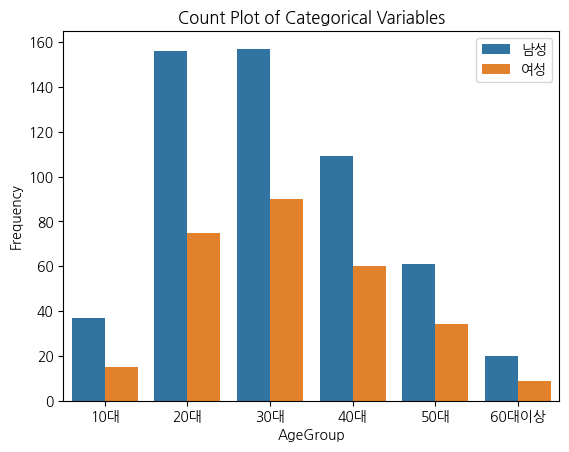

In [29]:
print_barplot(df_users, x="AgeGroup", hue="Gender", x_order=age_order, hue_order=gender_order)

In [30]:
# 20대와 30대의 숫자가 매우 유사함

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


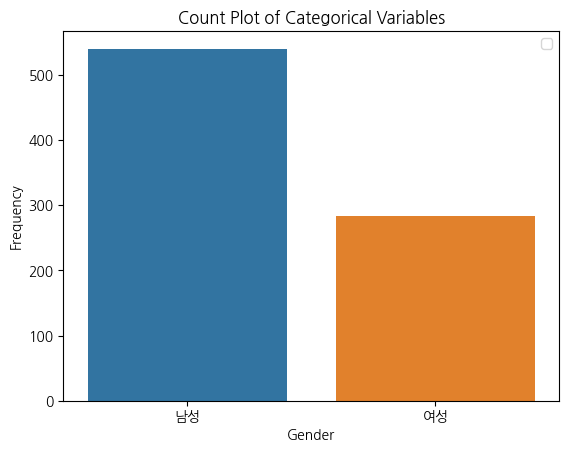

In [31]:
print_barplot(df_users, x = "Gender", x_order=gender_order)

In [32]:
# 남성과 여성의 비율이 2배 차이이다.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


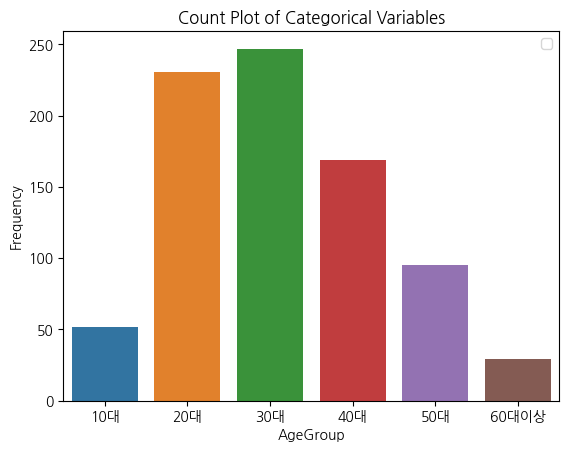

In [33]:
print_barplot(df_users, x = "AgeGroup", x_order=age_order)

In [34]:
# 전체 기간중 방문 횟수이다.

In [35]:
# 후에 보면 알겠지만 20 년도와 21년도의 방문나이대 및 매출액의 변동이 심해서 이 데이터는 의미가 없을지도 모른다.

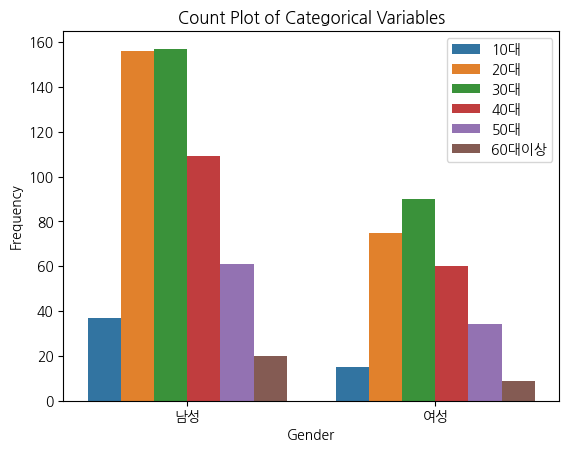

In [36]:
print_barplot(df_users, x="Gender", hue="AgeGroup", x_order=gender_order, hue_order=age_order)

In [37]:
# 남성 여성별 따로 전체 기간중 방문기간에 대한 그래프 이다.

In [38]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   idUser      823 non-null    object 
 1   Gender      823 non-null    object 
 2   AgeGroup    823 non-null    object 
 3   VisitCount  823 non-null    float64
 4   TotalPrice  823 non-null    float64
dtypes: float64(2), object(3)
memory usage: 32.3+ KB


In [39]:
def print_barplot(data, x, y=None, hue=None, x_order=None, hue_order=None):
    sns.barplot(x=x, y=y, hue=hue, data=data, order=x_order, hue_order=hue_order)

    plt.legend()
    plt.show()

In [40]:
# y축이 들어가는 바 플롯 그래프 이다.

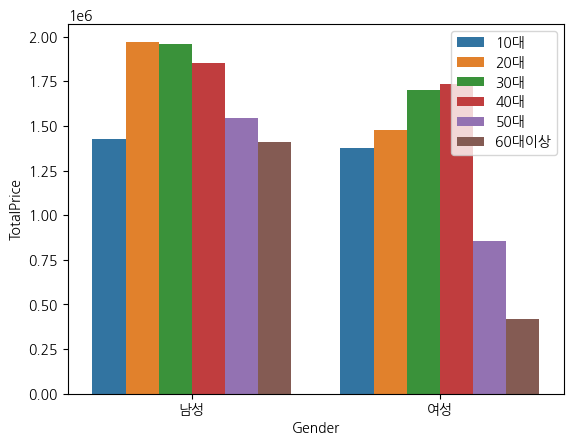

In [41]:
df_mean_price = df_users.groupby(["Gender", "AgeGroup"])["TotalPrice"].median().reset_index()
# groupby를 이용해서 각 그룹의 지출 평균 금액을 계산하고 데이터프레임을 생성합니다. 이후에 reset_index()를 호출해서 인덱스를 초기화합니다.
print_barplot(df_mean_price, x="Gender", y="TotalPrice", hue="AgeGroup", x_order=gender_order, hue_order=age_order)
# 위에서 생성한 데이터프레임을 활용해서 그래프를 출력합니다.

In [42]:
# 남성과 여성의 평균 매출액 차이이다.

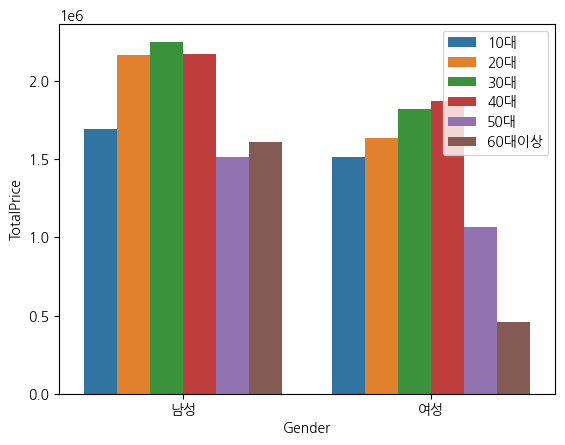

In [43]:
# 사용자 정의 함수
def print_barplot(data, x, y=None, hue=None, x_order=None, hue_order=None):
    ax = sns.barplot(x=x, y=y, hue=hue, data=data, order=x_order, hue_order=hue_order)

    plt.legend()
    plt.show()

# 각 그룹별 지출 평균 금액을 계산하여 데이터프레임 생성
df_mean_price = df_users.groupby(["Gender", "AgeGroup"])["TotalPrice"].mean().reset_index()

# 위에서 생성한 데이터프레임을 활용해서 그래프를 출력합니다.
print_barplot(df_mean_price, x="Gender", y='TotalPrice', hue="AgeGroup", x_order=gender_order, hue_order=age_order)

In [44]:
# 평균 지출 금액인데 혹시나 이상치가 있을까봐 걱정되어 중앙값으로 측정 하였음

C:\Users\hanseokhyun\AppData\Local\Temp\ipykernel_27040\302322583.py:25: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  plt.tight_layout()
C:\Users\hanseokhyun\AppData\Local\Temp\ipykernel_27040\302322583.py:25: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  plt.tight_layout()
C:\Users\hanseokhyun\AppData\Local\Temp\ipykernel_27040\302322583.py:25: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  plt.tight_layout()
C:\Users\hanseokhyun\AppData\Local\Temp\ipykernel_27040\302322583.py:25: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layout()
C:\Users\hanseokhyun\AppData\Local\Temp\ipykernel_27040\302322583.py:25: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
C:\Users\hanseokhyun\AppData\Local\Temp\ipykernel_27040\302322583.py:25: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from cu

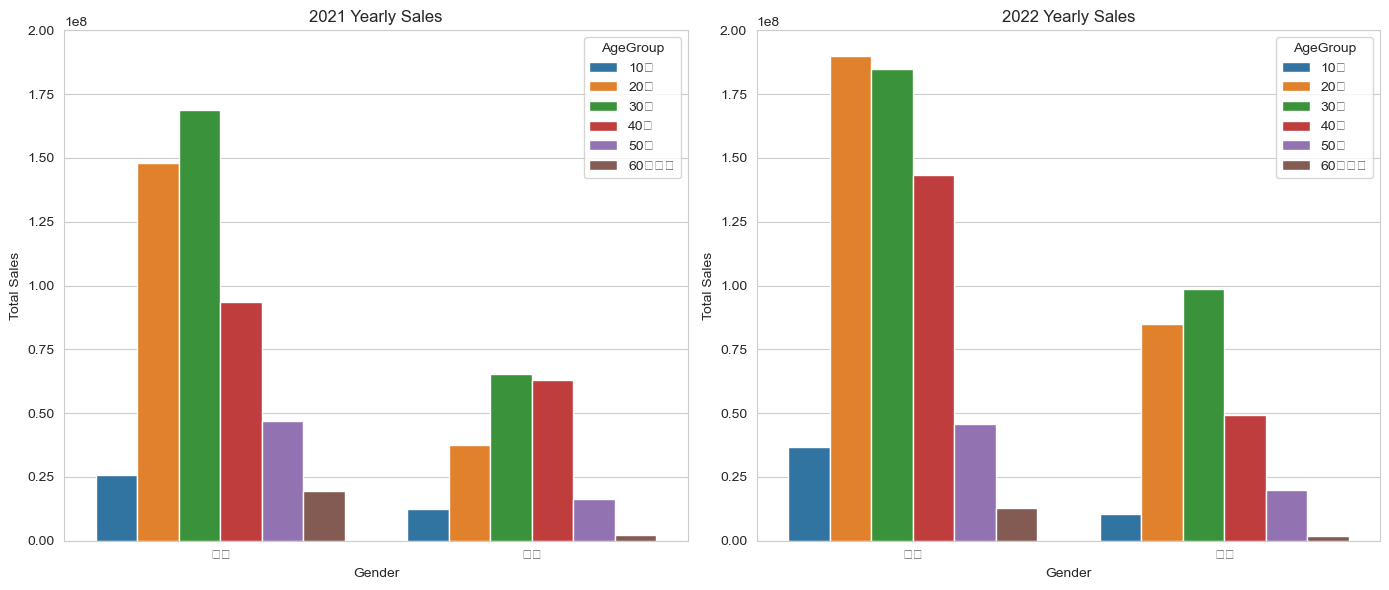

In [45]:
# 년도 정보에서 연도만 추출하여 새로운 열('Year')을 생성합니다.
df_users['Year'] = df_sales_raw['SalesDate'].apply(lambda date: date.year)

# 연도별 총 매출액을 계산합니다.
df_yearly_sales = df_users.groupby(['Gender', 'AgeGroup', 'Year'])['TotalPrice'].sum().reset_index()

# 남성과 여성, 연령대별로 2021년과 2022년의 총 매출액을 추출합니다.
df_2021_sales = df_yearly_sales[(df_yearly_sales['Year'] == 2021)].groupby(['Gender', 'AgeGroup'])['TotalPrice'].sum().reset_index()
df_2022_sales = df_yearly_sales[(df_yearly_sales['Year'] == 2022)].groupby(['Gender', 'AgeGroup'])['TotalPrice'].sum().reset_index()

# 그래프를 그립니다.
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# 2021년 총 매출액 그래프
sns.barplot(data=df_2021_sales, x="Gender", y="TotalPrice", hue="AgeGroup", ax=axes[0])
axes[0].set_title("2021 Yearly Sales")
axes[0].set_ylabel("Total Sales")
axes[0].set_ylim([0, 200000000])
# 2022년 총 매출액 그래프
sns.barplot(data=df_2022_sales, x="Gender", y="TotalPrice", hue="AgeGroup", ax=axes[1])
axes[1].set_title("2022 Yearly Sales")
axes[1].set_ylabel("Total Sales")
axes[1].set_ylim([0, 200000000])
plt.tight_layout()
plt.show()

In [46]:
# 2020년도와 2021년도의 평균 매출액 차이이다. 매출액이 오늘이유에 대한 데이터 분석이 본격적으로 가능 해졌다고 생각한다.

C:\Users\hanseokhyun\AppData\Local\Temp\ipykernel_27040\2205481180.py:27: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layout()
C:\Users\hanseokhyun\AppData\Local\Temp\ipykernel_27040\2205481180.py:27: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
C:\Users\hanseokhyun\AppData\Local\Temp\ipykernel_27040\2205481180.py:27: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be fi

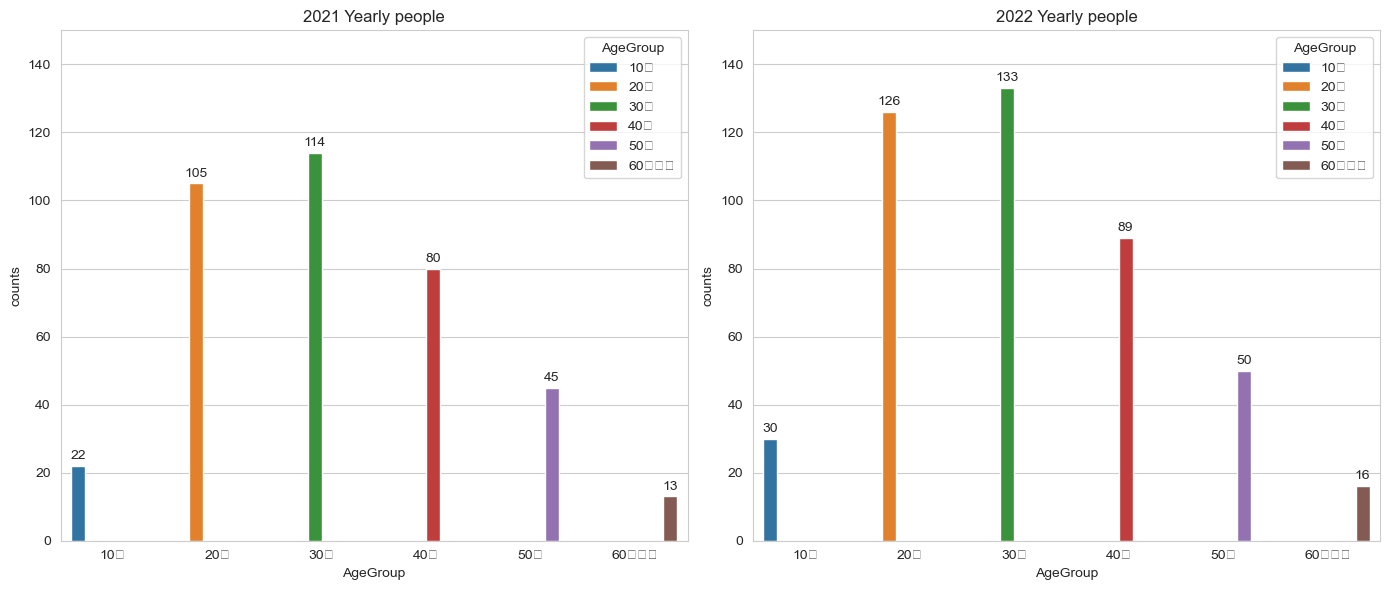

In [47]:
df_sales_raw['Year'] = df_sales_raw['SalesDate'].apply(lambda date: date.year)

df_yearly_sales = df_users.groupby([ 'AgeGroup', 'Year'])['Gender'].count().reset_index()

df_2021_sales = df_yearly_sales[(df_yearly_sales['Year'] == 2021)].groupby([ 'AgeGroup'])['Gender'].sum().reset_index()
df_2022_sales = df_yearly_sales[(df_yearly_sales['Year'] == 2022)].groupby(['AgeGroup'])['Gender'].sum().reset_index()

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.barplot(data=df_2021_sales, x="AgeGroup", y="Gender", hue="AgeGroup", ax=axes[0])
axes[0].set_title("2021 Yearly people")
axes[0].set_ylabel("counts")
axes[0].set_ylim([0, 150])

sns.barplot(data=df_2022_sales, x="AgeGroup", y="Gender", hue="AgeGroup", ax=axes[1])
axes[1].set_title("2022 Yearly people")
axes[1].set_ylabel("counts")
axes[1].set_ylim([0, 150])

# 막대 위에 수치 표시
for i, ax in enumerate(axes.flatten()):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 2, f'{height:.0f}', ha="center", fontsize=10)

plt.tight_layout()
plt.show()

In [48]:
# 2020 년도와 2021년도의 고객수 차이이다. 40대가 9명 밖에 오르지 않았지만, 매출액이 많이 오른것이 시사 할 점이다.

In [49]:
# # 해야 할 일
# 1, 고객의 등급화 기준 정해서 파생 변수 만들기
# 2, 2020년도의 정보만을 담은 csv 파일 2021만 들어있는 csv 파일을 따로 만드는것이 필요해 보인다.
# 3, 시계열을 써야 할것 같은데 한석현은 잘 몰라서 못하곘음 ㅎㅎ 쏘리
# 4, 시계열 그래프 시각화를 통해서 날씨 데이터를 받아와야 유의미한 날씨 경영이 될것으로 보임

In [61]:
df_2021_sales_raw = []
df_2022_sales_raw = []

In [66]:
df_2021_sales_raw = df_sales_raw[df_sales_raw['Year'] == 2021]
df_2022_sales_raw = df_sales_raw[df_sales_raw['Year'] == 2022]
# df_2023_sales_raw = df_sales_raw[df_sales_raw['Year'] == 2023]

In [64]:
df_2021_sales_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241915 entries, 2 to 507223
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   idUser           241915 non-null  object        
 1   idPOS            241915 non-null  object        
 2   SalesDT          241915 non-null  datetime64[ns]
 3   SalesDate        241915 non-null  datetime64[ns]
 4   ItemId           241915 non-null  object        
 5   Gender           241915 non-null  object        
 6   AgeGroup         241915 non-null  object        
 7   ItemIdLarge      241915 non-null  object        
 8   ItemNameLarge    241915 non-null  object        
 9   ItemIdMiddle     241915 non-null  object        
 10  ItemNameMiddle   241915 non-null  object        
 11  ItemName         241915 non-null  object        
 12  Item_CatORMaker  241915 non-null  object        
 13  Price            241915 non-null  int64         
 14  ImageUrl         241

In [65]:
df_2022_sales_raw

,idUser,idPOS,SalesDT,SalesDate,ItemId,Gender,AgeGroup,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,ItemName,Item_CatORMaker,Price,ImageUrl,Year
0,U101097,POS2022-10267,2022-11-06 04:08:48,2022-11-06,I-8809802264069,남성,30대,L1,간편식사,M2,샌드위치,피)살라미마르게리따피자,피자,5500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,2022
1,U101094,POS2022-10233,2022-06-15 21:25:22,2022-06-15,I-8801068398441,남성,10대,L1,간편식사,M2,샌드위치,햄)메이플더블치즈버거,햄버거,3000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,2022
6,U101092,POS2022-10079,2022-04-27 22:00:29,2022-04-27,I-8809453263626,여성,20대,L1,간편식사,M3,주먹밥,주)소고기고추장,주먹밥,1000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,2022
7,U101070,POS2022-10178,2022-08-12 12:04:24,2022-08-12,I-8801068388664,여성,10대,L1,간편식사,M1,도시락,샐)흑임자치킨샐러드,샐러드,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,2022
9,U101094,POS2022-10078,2022-03-24 19:42:42,2022-03-24,I-8801068396300,남성,10대,L1,간편식사,M2,샌드위치,햄)모짜치즈볼트리플버거,햄버거,3400,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507210,U101081,POS2022-10069,2022-04-18 08:45:48,2022-04-18,I-8808024031091,남성,20대,L6,음료,M2,아이스,22del)디카페인아메리카,22del,900,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,2022
507214,U101065,POS2022-10218,2022-05-14 11:22:09,2022-05-14,I-8801155723750,남성,20대,L6,음료,M3,유제품,동원)그린덴마크귀리190m,동원,1200,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,2022
507215,U101065,POS2022-10222,2022-05-17 20:34:21,2022-05-17,I-8801056228149,남성,20대,L6,음료,M2,아이스,롯데)칸타타바닐라아메23,롯데,1200,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,2022
507218,U101065,POS2022-10273,2022-06-10 11:54:54,2022-06-10,I-8801105908367,남성,20대,L6,음료,M1,음료,해태)아침에사과P500ml,해태,1800,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,2022


# 아으 배고파